In [ ]:
from google.colab import files
uploaded = files.upload()

Saving historical-data-of-odisha.csv to historical-data-of-odisha.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
path = '/content/historical-data-of-odisha.csv'
df = pd.read_csv(path)

In [ ]:
order = (2, 2, 2)

In [ ]:
df = df[5:17]

In [ ]:
df_excluded = df[['Year', 'FTA in Odisha']]

In [ ]:
df_excluded['FTA in Odisha'] = df_excluded['FTA in Odisha'].str.replace(',', '').astype(int)

<ipython-input-30-0e4a2c8dbc47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded['FTA in Odisha'] = df_excluded['FTA in Odisha'].str.replace(',', '').astype(int)


In [ ]:
df_excluded.dtypes

Year             int64
FTA in Odisha    int64
dtype: object

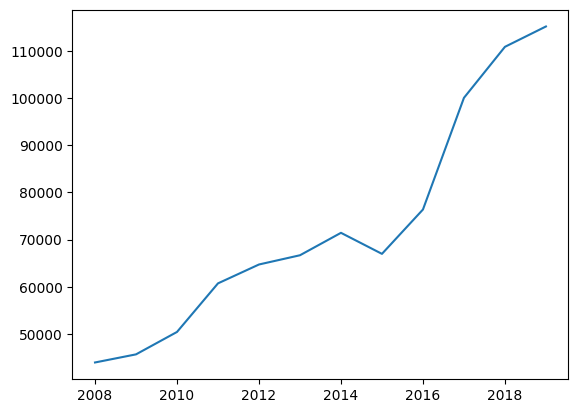

In [ ]:
plt.plot(df_excluded['Year'], df_excluded['FTA in Odisha'])

In [ ]:
df_train  = df_excluded[:10]
df_test = df_excluded[10:]

In [ ]:
df_train

,Year,FTA in Odisha
5,2008,43966
6,2009,45684
7,2010,50432
8,2011,60722
9,2012,64719
10,2013,66675
11,2014,71426
12,2015,66971
13,2016,76361
14,2017,100014


In [ ]:
df_test

,Year,FTA in Odisha
15,2018,110818
16,2019,115128


In [ ]:
testing_range = pd.date_range(start=datetime(2018, 1, 1), end=datetime(2019, 12, 31), freq='YS')

model = ARIMA(df_train['FTA in Odisha'], order=order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Year': testing_range.year, 'FTA in Odisha': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


    Year  FTA in Odisha
15  2018  114539.189041
16  2019  133814.807932


In [ ]:
rmse = np.sqrt(np.mean((df_test['FTA in Odisha'] - testing_df['FTA in Odisha']) ** 2))

mae = np.mean(np.abs(df_test['FTA in Odisha'] - testing_df['FTA in Odisha']))

rmse, mae

(13473.010772636595, 11203.998486295146)

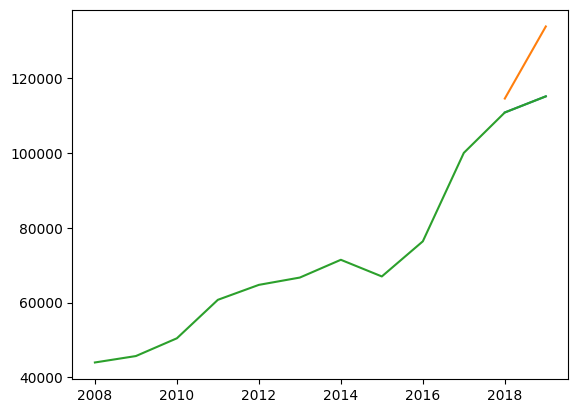

In [ ]:
plt.plot(df_test['Year'], df_test['FTA in Odisha'], label='Actual')
plt.plot(testing_df['Year'], testing_df['FTA in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA in Odisha'], label='Predicted')

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')

model = ARIMA(df_excluded['FTA in Odisha'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Year': forecast_range.year, 'FTA in Odisha': predictions})

print(predictions_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    Year  FTA in Odisha
17  2020  122125.003430
18  2021  129634.824510
19  2022  135969.015844
20  2023  142270.357507
21  2024  149057.263361
22  2025  155784.575401
23  2026  162322.340097
24  2027  168912.973920
25  2028  175573.148040
26  2029  182201.249973
27  2030  188805.745568
28  2031  195426.903129
29  2032  202055.205718
30  2033  208675.621986
31  2034  215294.303221
32  2035  221916.469492
33  2036  228538.820972
34  2037  235159.719838
35  2038  241780.761443
36  2039  248402.375443
37  2040  255023.845007
38  2041  261645.102283
39  2042  268266.450535
40  2043  274887.871892
41  2044  281509.245063
42  2045  288130.595593
43  2046  294751.969228
44  2047  301373.348644
45  2048  307994.717745
46  2049  314616.086034


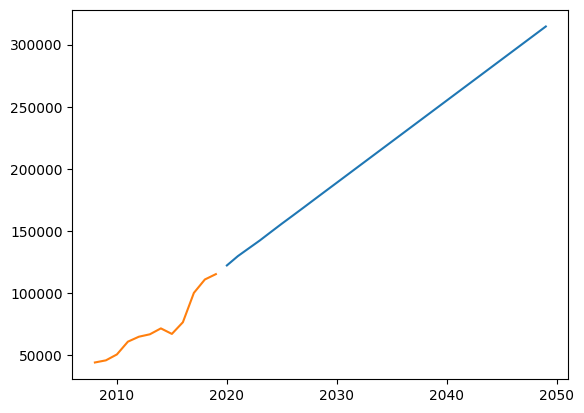

In [ ]:
plt.plot(predictions_df['Year'], predictions_df['FTA in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA in Odisha'], label='Predicted')

In [ ]:
testing_seq = df_train.copy()

model = ARIMA(testing_seq['FTA in Odisha'], order=order)
model_fit = model.fit()

for testing_year in testing_range:

    pred = model_fit.forecast(steps=1)

    testing_seq = pd.concat([testing_seq, pd.DataFrame({'Year': [testing_year.year], 'FTA in Odisha': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(testing_seq['FTA in Odisha'], order=order)
    model_fit = model.fit()

print(testing_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    Year  FTA in Odisha
0   2008   43966.000000
1   2009   45684.000000
2   2010   50432.000000
3   2011   60722.000000
4   2012   64719.000000
5   2013   66675.000000
6   2014   71426.000000
7   2015   66971.000000
8   2016   76361.000000
9   2017  100014.000000
10  2018  114539.189041
11  2019  121056.064900


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
testing_seq = testing_seq.iloc[10:]

In [ ]:
df_test = df_test.reset_index(drop=True)
testing_seq = testing_seq.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['FTA in Odisha'] - testing_seq['FTA in Odisha']) ** 2))

mae = np.mean(np.abs(df_test['FTA in Odisha'] - testing_seq['FTA in Odisha']))

rmse, mae

(4949.202023263586, 4824.626970309342)

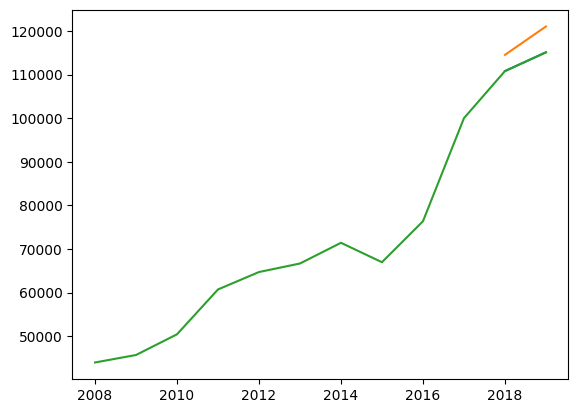

In [ ]:
plt.plot(df_test['Year'], df_test['FTA in Odisha'], label='Actual')
plt.plot(testing_seq['Year'], testing_seq['FTA in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA in Odisha'], label='Predicted')

In [ ]:
df_test

,Year,FTA in Odisha
0,2018,110818
1,2019,115128


In [ ]:
predictions_seq = df_excluded.copy()

forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')
model = ARIMA(predictions_seq['FTA in Odisha'], order=order)
model_fit = model.fit()

for forecast_year in forecast_range:

    pred = model_fit.forecast(steps=1)

    predictions_seq = pd.concat([predictions_seq, pd.DataFrame({'Year': [forecast_year.year], 'FTA in Odisha': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(predictions_seq['FTA in Odisha'], order=order)
    model_fit = model.fit()

print(predictions_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:60

    Year  FTA in Odisha
0   2008   43966.000000
1   2009   45684.000000
2   2010   50432.000000
3   2011   60722.000000
4   2012   64719.000000
5   2013   66675.000000
6   2014   71426.000000
7   2015   66971.000000
8   2016   76361.000000
9   2017  100014.000000
10  2018  110818.000000
11  2019  115128.000000
12  2020  122125.003430
13  2021  130692.713204
14  2022  138170.311572
15  2023  145949.999751
16  2024  153333.543825
17  2025  161109.700026
18  2026  168727.596506
19  2027  176352.872112
20  2028  184270.460415
21  2029  192254.713723
22  2030  200226.726008
23  2031  207959.065351
24  2032  215619.656143
25  2033  223503.024727
26  2034  231459.031845
27  2035  239402.505107
28  2036  247127.744370
29  2037  254803.964207
30  2038  262512.533302
31  2039  270382.930973
32  2040  278307.184672
33  2041  286221.109888
34  2042  294134.869707
35  2043  301873.047674
36  2044  309717.952324
37  2045  317632.476439
38  2046  325536.718995
39  2047  333250.205345
40  2048  341081

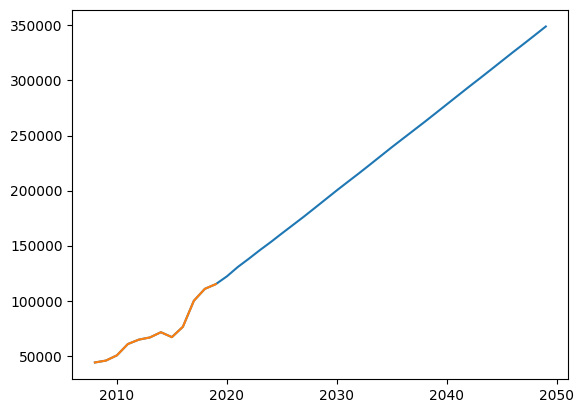

In [ ]:
plt.plot(predictions_seq['Year'], predictions_seq['FTA in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA in Odisha'], label='Predicted')